In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import missingno as msno
cf.go_offline()

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
import os
os.listdir()

['Practica 2.ipynb',
 '.ipynb_checkpoints',
 'segmentation data legend.xlsx',
 '~$segmentation data legend.xlsx',
 'segmentation data.csv',
 'p2 Gen 13.pdf']

In [4]:
df= pd.read_csv("segmentation data.csv",encoding="utf-8")
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [5]:
df.shape

(2000, 8)

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated(subset="ID").sum()

0

<AxesSubplot:>

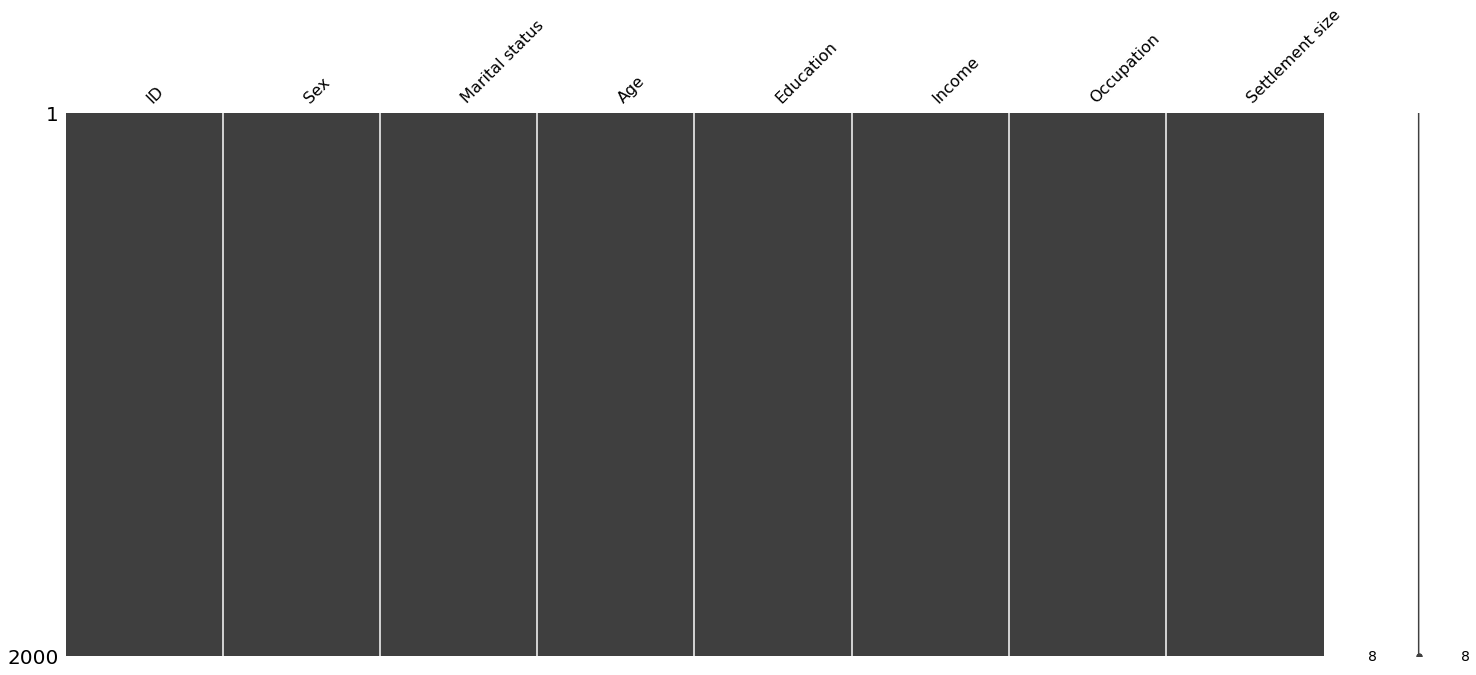

In [9]:
msno.matrix(df)

In [10]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table = pd.DataFrame(mz_table)
        return mz_table
table=missing_zero_values_table(df)
table

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
ID,0,0,0.0,0
Sex,1086,0,0.0,1086
Marital status,1007,0,0.0,1007
Age,0,0,0.0,0
Education,287,0,0.0,287
Income,0,0,0.0,0
Occupation,633,0,0.0,633
Settlement size,989,0,0.0,989


In [11]:
# Division de variables
vcont=["Age","Income"]
sin_importancia = ["ID"]
vdisc=[c for c in df.columns if c not in vcont+sin_importancia]
vdisc

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [12]:
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Sex')]

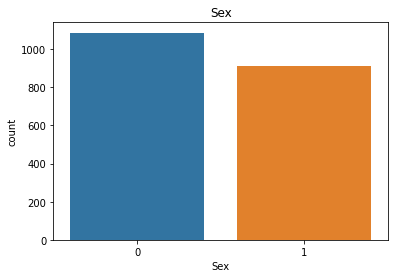

In [13]:
sns.countplot(df[vdisc[0]]).set(title=vdisc[0])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Marital status')]

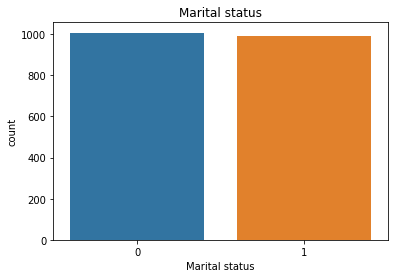

In [14]:
sns.countplot(df[vdisc[1]]).set(title=vdisc[1])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Education')]

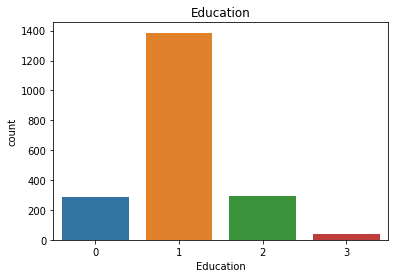

In [15]:
sns.countplot(df[vdisc[2]]).set(title=vdisc[2])

In [16]:
df[vdisc[2]].value_counts(1,dropna=False)

1    0.6930
2    0.1455
0    0.1435
3    0.0180
Name: Education, dtype: float64

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Occupation')]

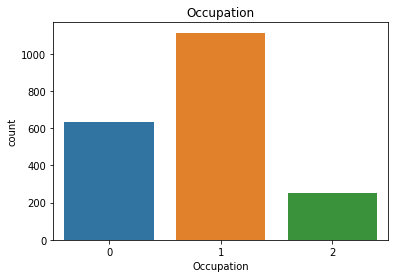

In [17]:
sns.countplot(df[vdisc[3]]).set(title=vdisc[3])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Settlement size')]

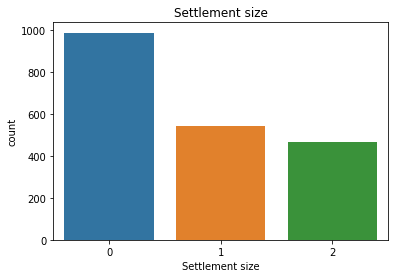

In [18]:
sns.countplot(df[vdisc[4]]).set(title=vdisc[4])

# Continuas

In [19]:
df[vcont].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
10%,24.000000,78235.500000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
90%,53.000000,167780.600000
max,76.000000,309364.000000


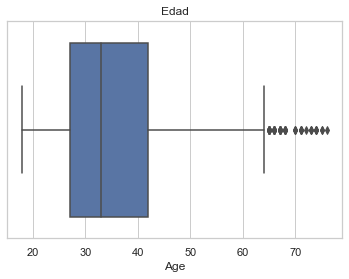

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Age"]).set(title="Edad")

[Text(0.5, 1.0, 'Edad')]

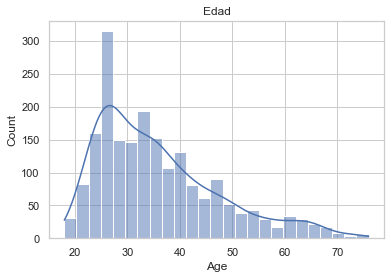

In [21]:
sns.histplot(data=df, x="Age", kde=True).set(title="Edad")

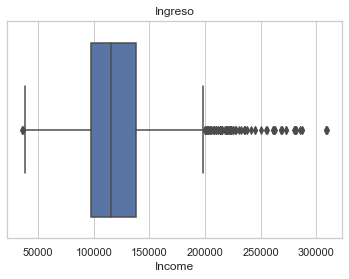

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Income"]).set(title="Ingreso")

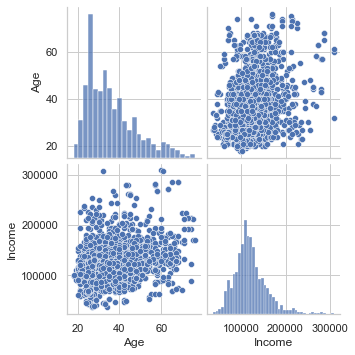

In [23]:
sns.pairplot(df[vcont])

<AxesSubplot:xlabel='Age', ylabel='Income'>

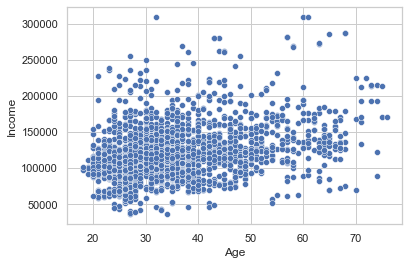

In [24]:
sns.scatterplot(data=df, x="Age", y="Income")

<AxesSubplot:xlabel='Income', ylabel='Age'>

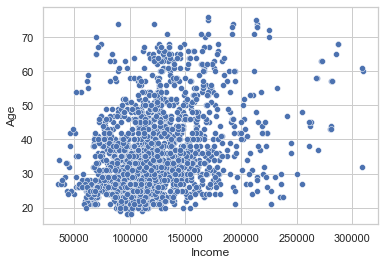

In [25]:
sns.scatterplot(data=df, x="Income", y="Age")

# Preparacion de los datos

In [26]:
# Para las variables categoricas
sexo= {0:"Male",1:"Female"}
maritial = {0:"Single",1:"Non-single"}
education = {0:"Other",1:"High_school",2:"University",3:"Graduate_School"}
occupation = {0:"Unemployed",1:"Skilled_employee",2:"Manager"}
size={0:"Small_city",1:"Mid-sized_city",2:"Big_city"}

In [27]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [28]:
df["Sex"]=df["Sex"].map(sexo)
df["Marital status"]= df["Marital status"].map(maritial)
df["Education"] = df["Education"].map(education)
df["Occupation"] = df["Occupation"].map(occupation)
df["Settlement size"] = df["Settlement size"].map(size)
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Male,Single,67,University,124670,Skilled_employee,Big_city
1,100000002,Female,Non-single,22,High_school,150773,Skilled_employee,Big_city
2,100000003,Male,Single,49,High_school,89210,Unemployed,Small_city
3,100000004,Male,Single,45,High_school,171565,Skilled_employee,Mid-sized_city
4,100000005,Male,Single,53,High_school,149031,Skilled_employee,Mid-sized_city
...,...,...,...,...,...,...,...,...
1995,100001996,Female,Single,47,High_school,123525,Unemployed,Small_city
1996,100001997,Female,Non-single,27,High_school,117744,Skilled_employee,Small_city
1997,100001998,Male,Single,31,Other,86400,Unemployed,Small_city
1998,100001999,Female,Non-single,24,High_school,97968,Unemployed,Small_city


/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Sex')]

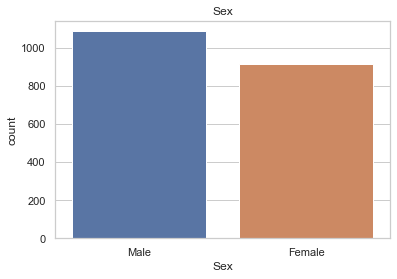

In [29]:
sns.countplot(df[vdisc[0]]).set(title=vdisc[0])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Marital status')]

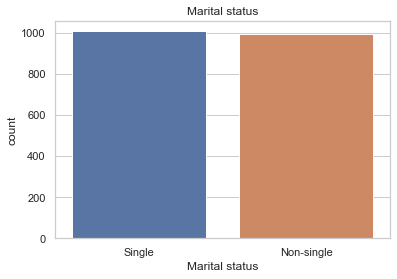

In [30]:
sns.countplot(df[vdisc[1]]).set(title=vdisc[1])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Education')]

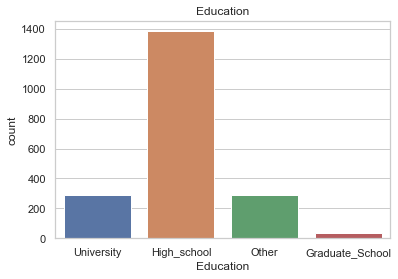

In [31]:
sns.countplot(df[vdisc[2]]).set(title=vdisc[2])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Occupation')]

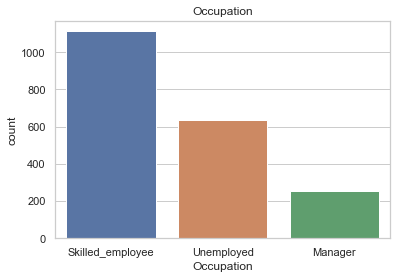

In [32]:
sns.countplot(df[vdisc[3]]).set(title=vdisc[3])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Settlement size')]

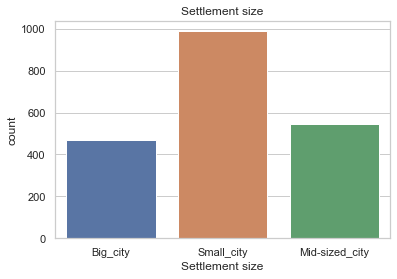

In [33]:
sns.countplot(df[vdisc[4]]).set(title=vdisc[4])

In [34]:
df.drop("ID",axis=1,inplace=True)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,Single,67,University,124670,Skilled_employee,Big_city
1,Female,Non-single,22,High_school,150773,Skilled_employee,Big_city
2,Male,Single,49,High_school,89210,Unemployed,Small_city
3,Male,Single,45,High_school,171565,Skilled_employee,Mid-sized_city
4,Male,Single,53,High_school,149031,Skilled_employee,Mid-sized_city
...,...,...,...,...,...,...,...
1995,Female,Single,47,High_school,123525,Unemployed,Small_city
1996,Female,Non-single,27,High_school,117744,Skilled_employee,Small_city
1997,Male,Single,31,Other,86400,Unemployed,Small_city
1998,Female,Non-single,24,High_school,97968,Unemployed,Small_city


In [36]:
df_modelo=df.drop(columns=vdisc)[vcont].join(pd.get_dummies(df[vdisc]))
df_modelo

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1


In [40]:
# Estandarizamos la base
from sklearn.preprocessing import StandardScaler
X=df_modelo[vcont].copy()
ss = StandardScaler(with_std=False)
sdf = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
sdf

,Age,Income
0,31.091,3715.581
1,-13.909,29818.581
2,13.091,-31744.419
3,9.091,50610.581
4,17.091,28076.581
...,...,...
1995,11.091,2570.581
1996,-8.909,-3210.419
1997,-4.909,-34554.419
1998,-11.909,-22986.419


<AxesSubplot:xlabel='Age', ylabel='Income'>

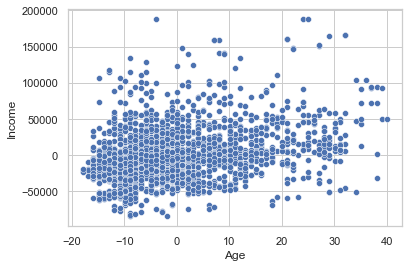

In [43]:
sns.scatterplot(data=sdf, x="Age", y="Income")

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=1000) #dim 2, perplexity vecinos que estimamos
data_tsne = tsne.fit_transform(sdf)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='x', ylabel='y'>

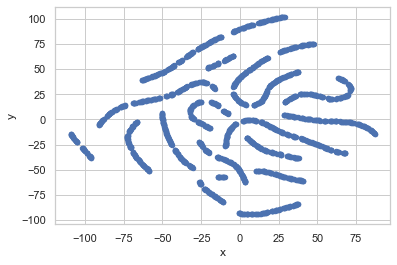

In [45]:
df_tsne.plot.scatter('x','y')

In [48]:
# Estandarizamos la base
from sklearn.preprocessing import MinMaxScaler
sm = MinMaxScaler()
mmdf = pd.DataFrame(sm.fit_transform(X),columns=X.columns)
mmdf

,Age,Income
0,0.844828,0.324781
1,0.068966,0.420210
2,0.534483,0.195144
3,0.465517,0.496223
4,0.603448,0.413842
...,...,...
1995,0.500000,0.320595
1996,0.155172,0.299460
1997,0.224138,0.184871
1998,0.103448,0.227162


<AxesSubplot:xlabel='Age', ylabel='Income'>

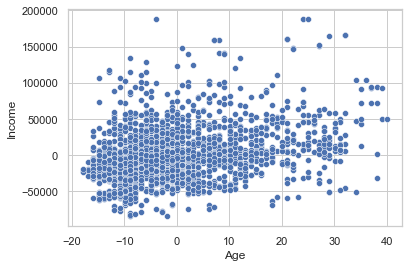

In [49]:
sns.scatterplot(data=sdf, x="Age", y="Income")

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=1000) #dim 2, perplexity vecinos que estimamos
data_tsne = tsne.fit_transform(mmdf)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='x', ylabel='y'>

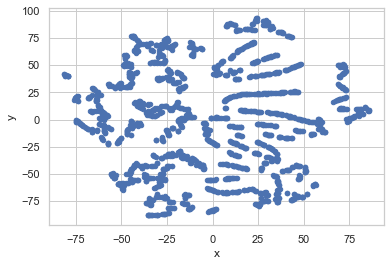

In [52]:
df_tsne.plot.scatter('x','y')

# PCA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='d1', ylabel='d2'>

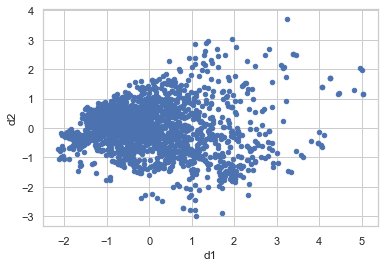

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pi = make_pipeline(StandardScaler(),PCA(n_components=2)) #Esa funcion con make_pipeline
Xp = pd.DataFrame(pi.fit_transform(X),columns=['d1','d2'])
Xp.plot.scatter('d1','d2')

Escogemos TSNE con MinMax scaler como visualizacion

# Cluster Jerarquico

In [55]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering #Clauster anglomerativo

from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram

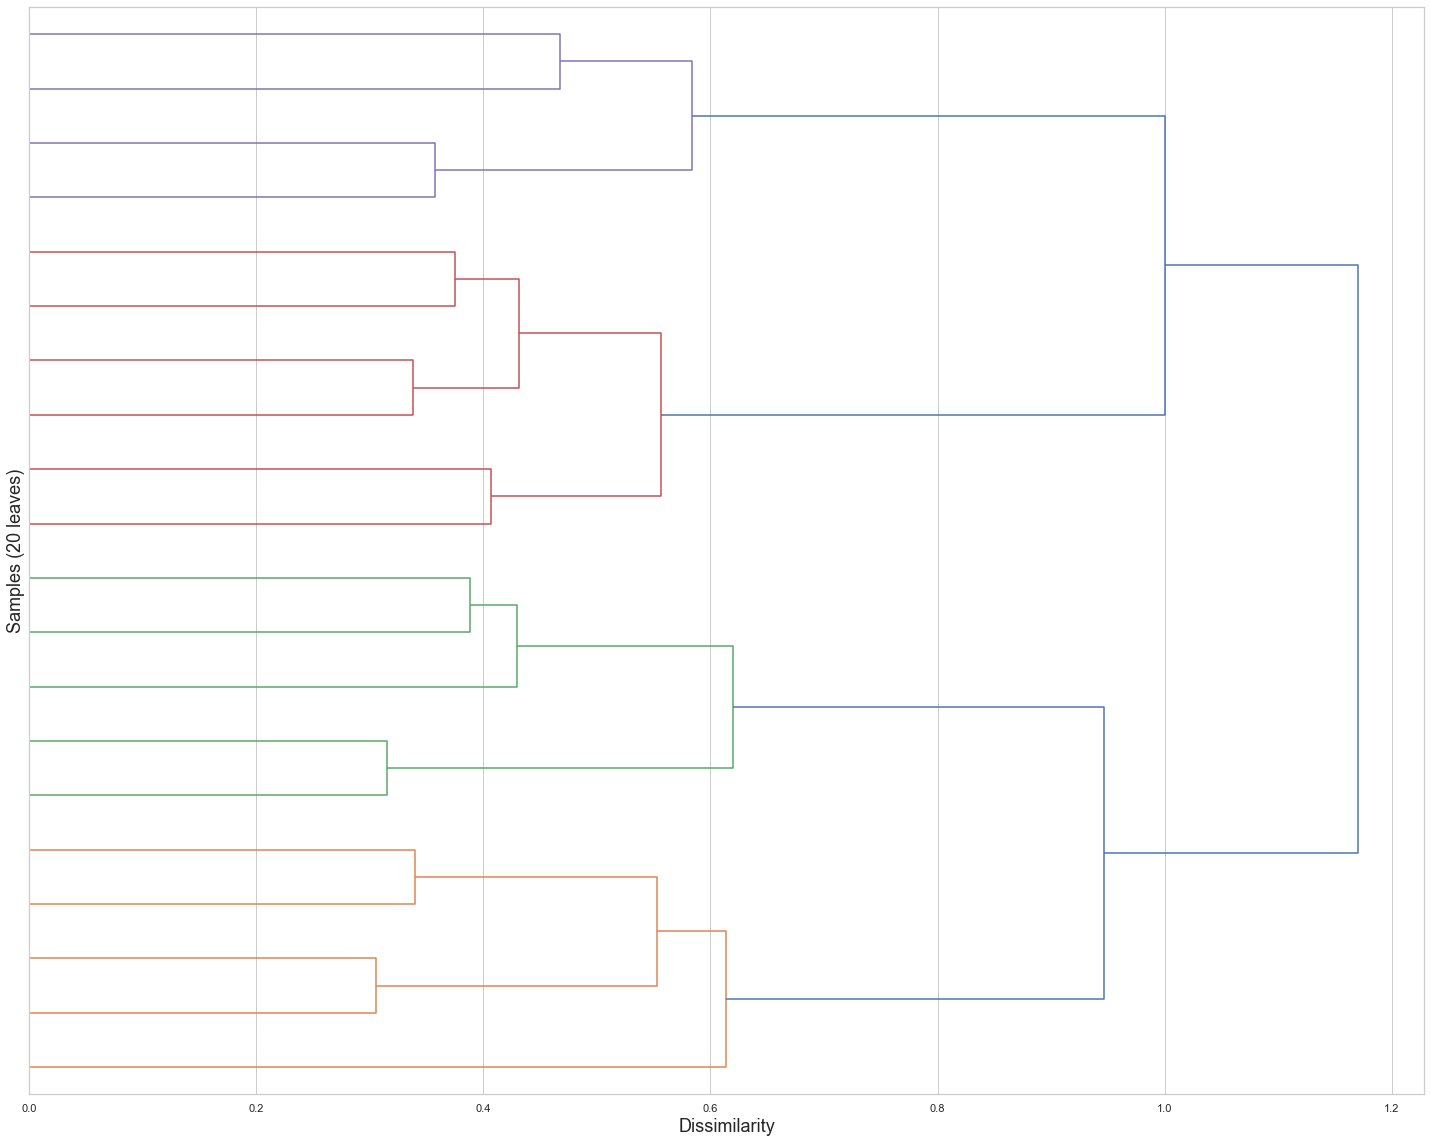

In [57]:
"""Completo"""
dm = pdist(mmdf, metric='euclidean')
Z = linkage(dm, method='complete') #Metodo completo

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (20 leaves)', fontsize=18)

plt.show()

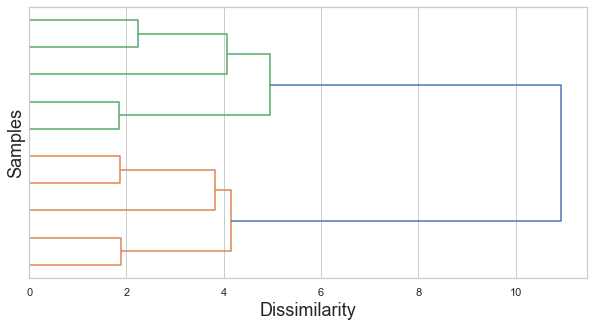

In [59]:
"""ward"""
dm = pdist(mmdf, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='ward')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

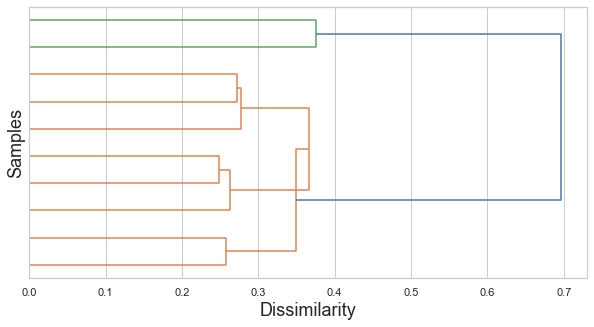

In [60]:
"""centroid"""
dm = pdist(mmdf, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='centroid')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

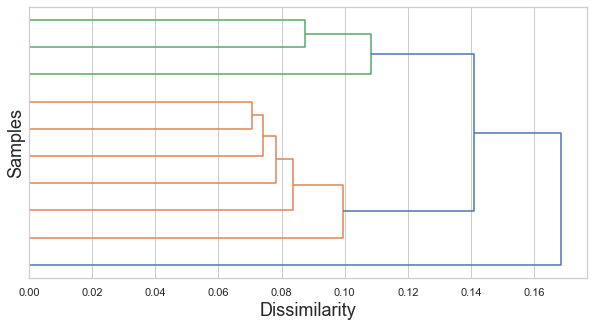

In [61]:
"""Single"""
"""ward"""
dm = pdist(mmdf, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

Podemos apreciar que guiados de los dendogramas de ward, complete y single se tiene a interpretacion 4 clusters

In [77]:
dff = pd.concat([X, df_tsne], axis=1)

In [78]:
dff

,Age,Income,x,y
0,67,124670,-24.188278,72.819016
1,22,150773,-19.434345,14.295553
2,49,89210,-16.177961,-33.031868
3,45,171565,-53.601833,29.171005
4,53,149031,-42.577908,42.759132
...,...,...,...,...
1995,47,123525,-36.989201,-41.567909
1996,27,117744,23.276720,7.462242
1997,31,86400,35.686378,-35.896538
1998,24,97968,31.918787,57.898777


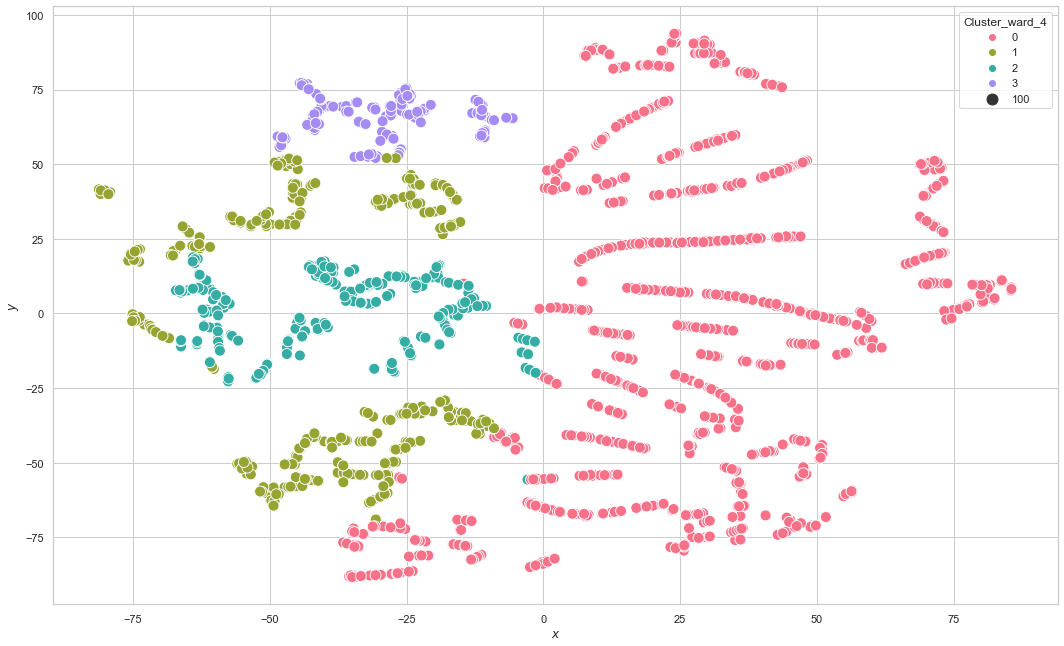

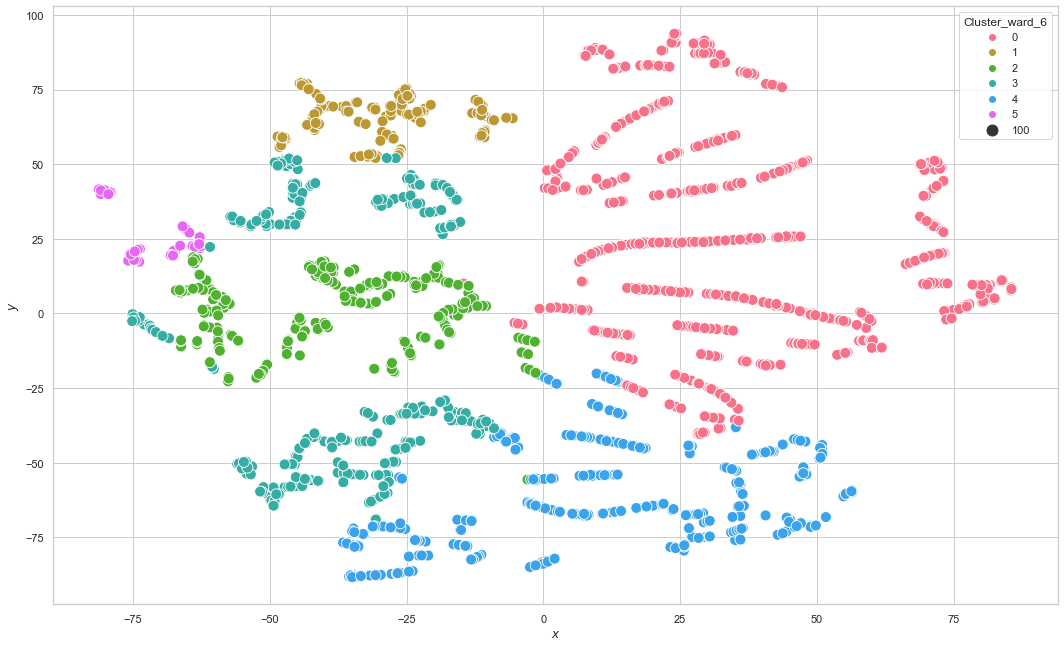

In [79]:
for n in (4,6):
  #Probamos con 4 y 6 grupos
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward') #Llamamos al clauster anglomerativo
    #affinity mediciones de las metricas, ward es forzoso euclideana
    Y_pred = ag.fit_predict(mmdf) #Pasamos nuestro conjunto de datos estandarizado

    df_pred = pd.Series(Y_pred, name='Cluster_ward_'+str(n), index=df.index)
    dff = pd.concat([dff, df_pred], axis=1)

    fig, ax = plt.subplots(figsize=(18, 11))
    sns.scatterplot(x='x',
                    y='y',
                    hue='Cluster_ward_'+str(n),
                    size=100,
                    
                    sizes=(120, 120),
                    palette=sns.color_palette("husl", n),
                    data=dff,
                    ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

In [80]:
dff

,Age,Income,x,y,Cluster_ward_4,Cluster_ward_6
0,67,124670,-24.188278,72.819016,3,1
1,22,150773,-19.434345,14.295553,2,2
2,49,89210,-16.177961,-33.031868,1,3
3,45,171565,-53.601833,29.171005,1,3
4,53,149031,-42.577908,42.759132,1,3
...,...,...,...,...,...,...
1995,47,123525,-36.989201,-41.567909,1,3
1996,27,117744,23.276720,7.462242,0,0
1997,31,86400,35.686378,-35.896538,0,0
1998,24,97968,31.918787,57.898777,0,0


In [82]:
dff["Cluster_ward_4"].value_counts(1,dropna=False)

0    0.5685
1    0.2055
2    0.1500
3    0.0760
Name: Cluster_ward_4, dtype: float64

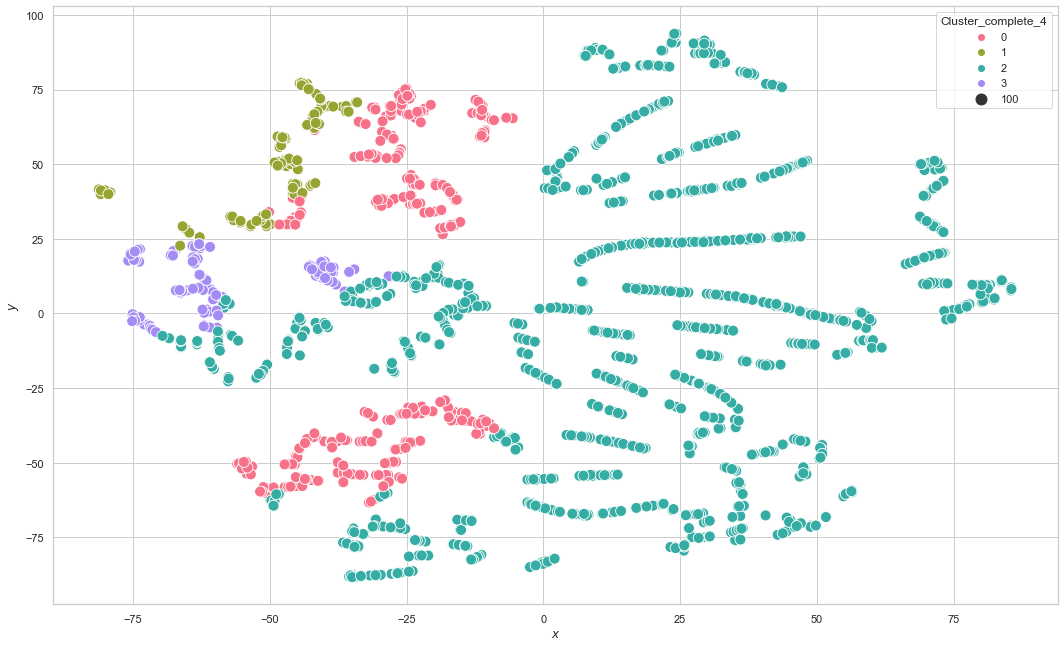

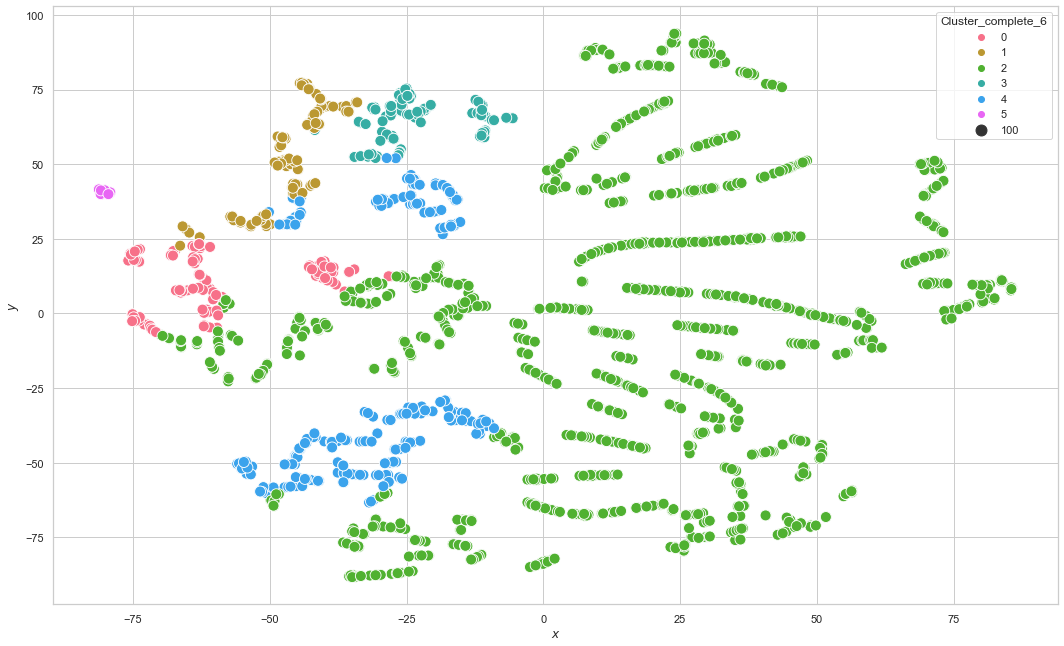

In [83]:
for n in (4,6):
  #Probamos con 4 y 6 grupos
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete') #Llamamos al clauster anglomerativo
    #affinity mediciones de las metricas, ward es forzoso euclideana
    Y_pred = ag.fit_predict(mmdf) #Pasamos nuestro conjunto de datos estandarizado

    df_pred = pd.Series(Y_pred, name='Cluster_complete_'+str(n), index=df.index)
    dff = pd.concat([dff, df_pred], axis=1)

    fig, ax = plt.subplots(figsize=(18, 11))
    sns.scatterplot(x='x',
                    y='y',
                    hue='Cluster_complete_'+str(n),
                    size=100,
                    
                    sizes=(120, 120),
                    palette=sns.color_palette("husl", n),
                    data=dff,
                    ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

In [84]:
dff

,Age,Income,x,y,Cluster_ward_4,Cluster_ward_6,Cluster_complete_4,Cluster_complete_6
0,67,124670,-24.188278,72.819016,3,1,0,3
1,22,150773,-19.434345,14.295553,2,2,2,2
2,49,89210,-16.177961,-33.031868,1,3,0,4
3,45,171565,-53.601833,29.171005,1,3,1,1
4,53,149031,-42.577908,42.759132,1,3,1,1
...,...,...,...,...,...,...,...,...
1995,47,123525,-36.989201,-41.567909,1,3,0,4
1996,27,117744,23.276720,7.462242,0,0,2,2
1997,31,86400,35.686378,-35.896538,0,0,2,2
1998,24,97968,31.918787,57.898777,0,0,2,2


<AxesSubplot:xlabel='Age', ylabel='Income'>

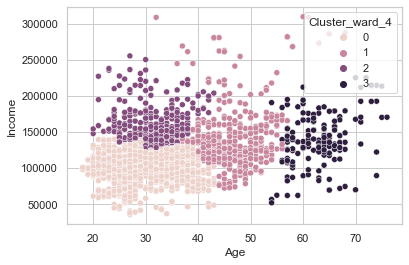

In [86]:
sns.scatterplot(data=dff, x="Age", y="Income",hue="Cluster_ward_4")

<AxesSubplot:xlabel='Age', ylabel='Income'>

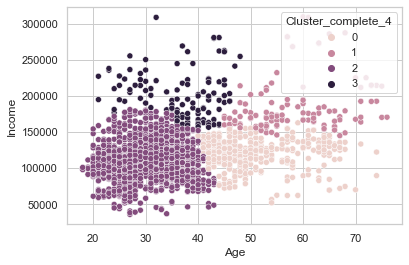

In [87]:
sns.scatterplot(data=dff, x="Age", y="Income",hue="Cluster_complete_4")

In [89]:
dff.to_csv("cluster_jerarquico.csv",index=False,encoding="utf-8")

In [90]:
df_modelo_=df_modelo.copy()
df_modelo_=df_modelo_.merge(dff[["Cluster_ward_4","Cluster_complete_4"]],how="left",right_index=True,left_index=True)
df_modelo_

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city,Cluster_ward_4,Cluster_complete_4
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3,0
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0,2,2
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,2
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,2


In [91]:
dff["Cluster_complete_4"].value_counts(1,dropna=False)

2    0.6945
0    0.1870
1    0.0600
3    0.0585
Name: Cluster_complete_4, dtype: float64

# Cluster de optimizacion

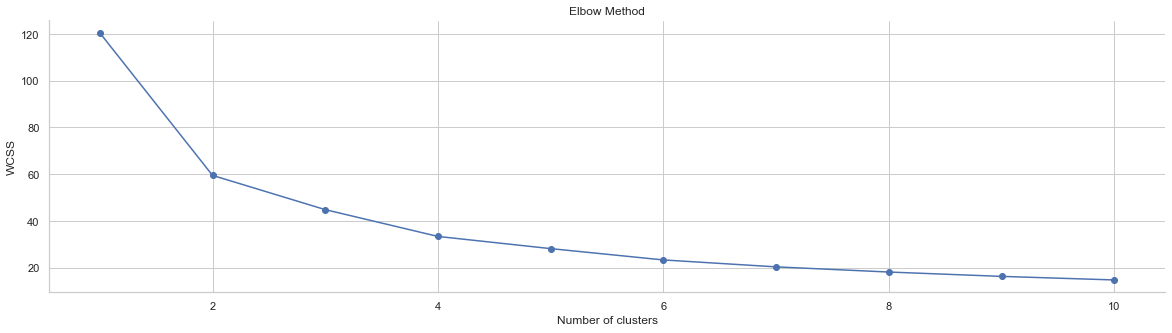

In [95]:
from sklearn.cluster import KMeans
#Calculamos el wcss o la inercia
wcss = []
for i in range(1, 11): #Rango de numero de clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    """Intanciamos el init es k-means++ para que no afecte tanto el cambio
    de centroides, en max iter es el numero de veces"""
    kmeans.fit(mmdf)
    wcss.append(kmeans.inertia_) #Guardamos la inercia
plt.subplots(figsize=(20,5))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

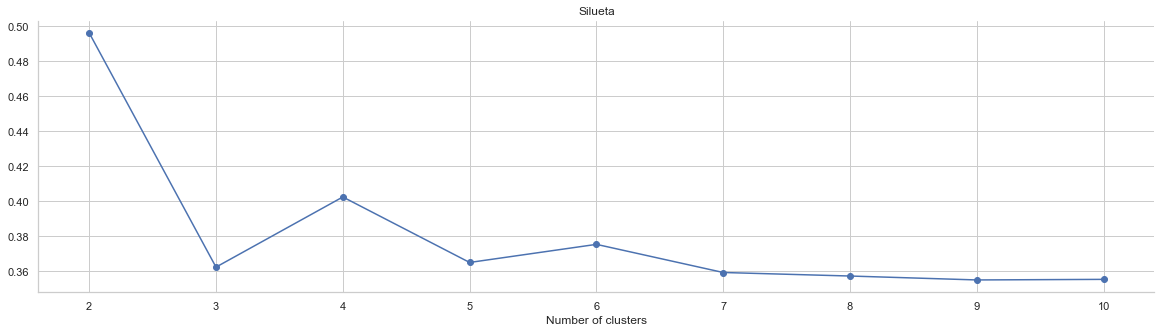

In [100]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples #Metricas
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k)
    cl_sil.fit(mmdf)
    lst_silhouette.append(silhouette_score(mmdf,cl_sil.predict(mmdf)))
    #compara maxima cohension y separacion
plt.subplots(figsize=(20,5))
plt.plot(range(2, 11), lst_silhouette,marker='o')
plt.title('Silueta')
plt.xlabel('Number of clusters')
sns.despine()
plt.show()

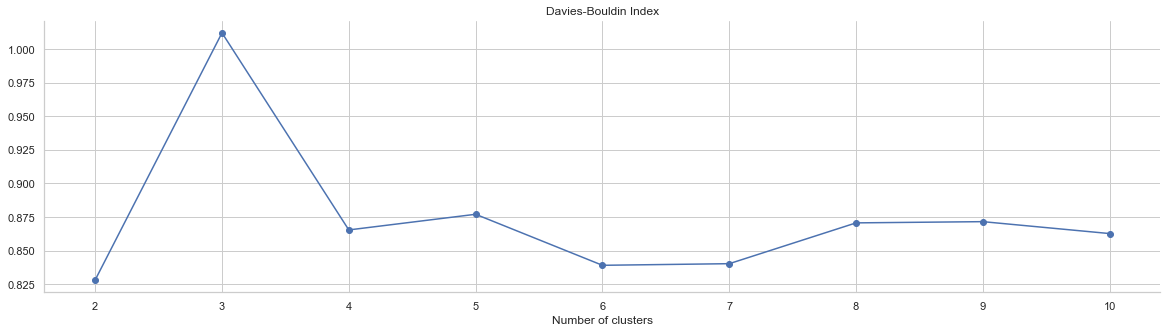

In [102]:
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(mmdf)
    lst_dbscore.append(davies_bouldin_score(mmdf,cl_db.predict(mmdf)))
    #Mas pequeño mejor
plt.subplots(figsize=(20,5))
plt.plot(range(2, 11), lst_dbscore,marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
sns.despine()
plt.show()

Podemos apreciare según todas las metricas que el mejor numero para k es 2

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



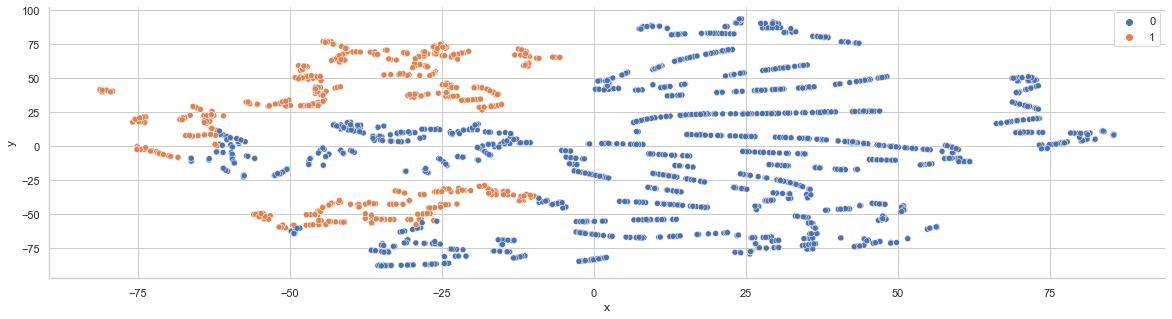

In [107]:
"""Con 2 cluster, se ve divison"""
current_palette = sns.color_palette()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(mmdf) #Asigna datos al grupo que le corresponda
plt.subplots(figsize=(20,5))
sns.scatterplot(dff["x"], dff["y"],hue=pred_y,palette=current_palette[:2])
sns.despine()
plt.show()

In [108]:
pred_y

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [110]:
df_modelo_["K-Means-2"]=pred_y
df_modelo_

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city,Cluster_ward_4,Cluster_complete_4,K-Means-2
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3,0,1
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0,2,2,0
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,0
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,2,0
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,2,0


<AxesSubplot:xlabel='Age', ylabel='Income'>

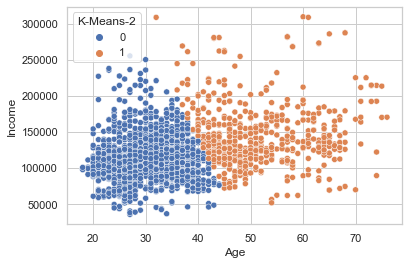

In [111]:
sns.scatterplot(data=df_modelo_, x="Age", y="Income",hue="K-Means-2")

In [113]:
#k-medioides
from sklearn_extra.cluster import KMedoids #Instalar scikit-learn-extra
medoids=KMedoids(n_clusters=2, metric='euclidean',method='pam')

In [115]:
medoids.fit_predict(mmdf)

array([1, 0, 1, ..., 0, 0, 0])

In [116]:
dff["K-Medioides-2"]=df_modelo_["K-Medioides-2"]=medoids.fit_predict(mmdf)

In [117]:
dff

,Age,Income,x,y,Cluster_ward_4,Cluster_ward_6,Cluster_complete_4,Cluster_complete_6,K-Medioides-2
0,67,124670,-24.188278,72.819016,3,1,0,3,1
1,22,150773,-19.434345,14.295553,2,2,2,2,0
2,49,89210,-16.177961,-33.031868,1,3,0,4,1
3,45,171565,-53.601833,29.171005,1,3,1,1,1
4,53,149031,-42.577908,42.759132,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,47,123525,-36.989201,-41.567909,1,3,0,4,1
1996,27,117744,23.276720,7.462242,0,0,2,2,0
1997,31,86400,35.686378,-35.896538,0,0,2,2,0
1998,24,97968,31.918787,57.898777,0,0,2,2,0


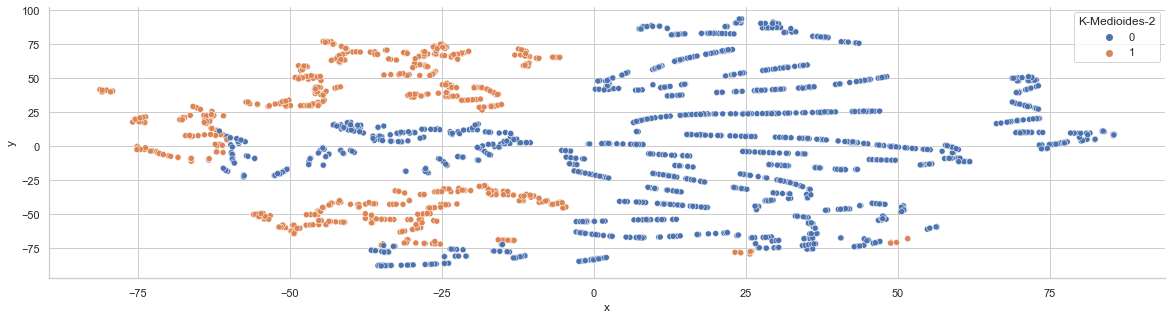

In [121]:
plt.subplots(figsize=(20,5))
sns.scatterplot(dff["x"], dff["y"],hue=dff["K-Medioides-2"],palette=current_palette[:2])
sns.despine()
plt.show()

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



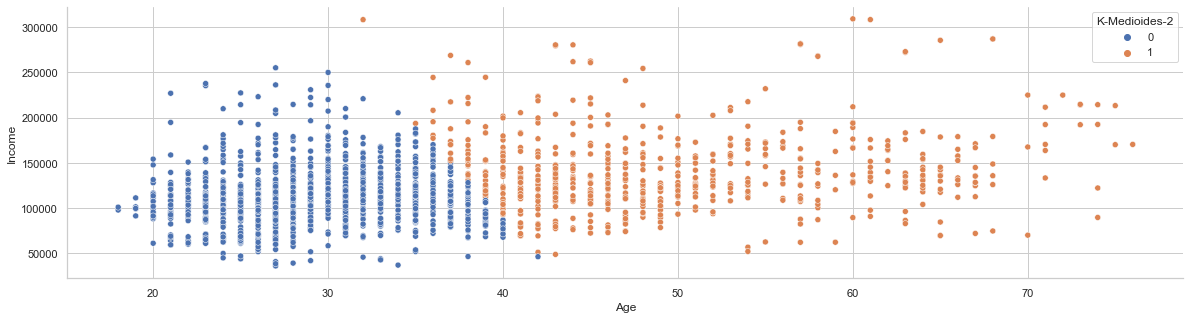

In [123]:
plt.subplots(figsize=(20,5))
sns.scatterplot(df_modelo_["Age"], df_modelo_["Income"],hue=df_modelo_["K-Medioides-2"],palette=current_palette[:2])
sns.despine()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income'>

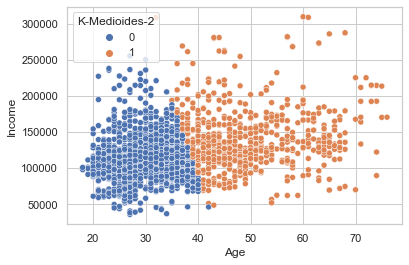

In [124]:
sns.scatterplot(data=df_modelo_, x="Age", y="Income",hue="K-Medioides-2")

In [125]:
df_modelo_.to_csv("Data_cluster.csv",index=False,encoding="utf-8")

In [126]:
pd.to_pickle(kmeans,'k_means_cluster_2.pkl') #guardamos el modelo 

In [128]:
pd.to_pickle(medoids,'k_medoids_cluster_2.pkl')

In [129]:
df_modelo_.columns

Index(['Age', 'Income', 'Sex_Female', 'Sex_Male', 'Marital status_Non-single',
       'Marital status_Single', 'Education_Graduate_School',
       'Education_High_school', 'Education_Other', 'Education_University',
       'Occupation_Manager', 'Occupation_Skilled_employee',
       'Occupation_Unemployed', 'Settlement size_Big_city',
       'Settlement size_Mid-sized_city', 'Settlement size_Small_city',
       'Cluster_ward_4', 'Cluster_complete_4', 'K-Means-2', 'K-Medioides-2'],
      dtype='object')

In [130]:
df_modelo_["Cluster_ward_4"].value_counts(1,dropna=False)

0    0.5685
1    0.2055
2    0.1500
3    0.0760
Name: Cluster_ward_4, dtype: float64

In [131]:
df_modelo_["Cluster_complete_4"].value_counts(1,dropna=False)

2    0.6945
0    0.1870
1    0.0600
3    0.0585
Name: Cluster_complete_4, dtype: float64

In [132]:
df_modelo_["K-Means-2"].value_counts(1,dropna=False)

0    0.722
1    0.278
Name: K-Means-2, dtype: float64

In [133]:
df_modelo_["K-Medioides-2"].value_counts(1,dropna=False)

0    0.6695
1    0.3305
Name: K-Medioides-2, dtype: float64

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'ward')]

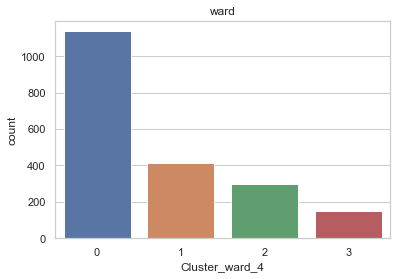

In [134]:
sns.countplot(df_modelo_["Cluster_ward_4"]).set(title="ward")

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'complete')]

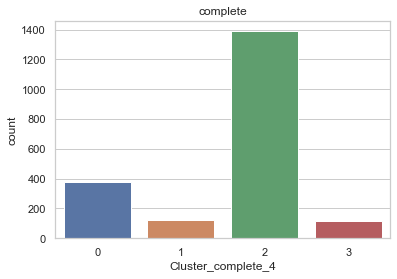

In [135]:
sns.countplot(df_modelo_["Cluster_complete_4"]).set(title="complete")

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'k-means')]

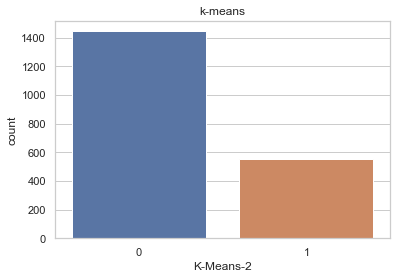

In [137]:
sns.countplot(df_modelo_["K-Means-2"]).set(title="k-means")

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'k-medioides')]

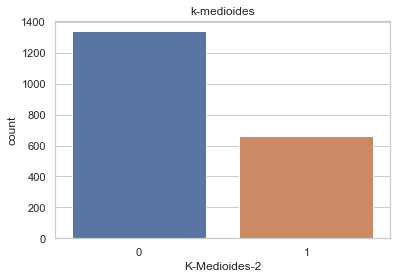

In [138]:
sns.countplot(df_modelo_["K-Medioides-2"]).set(title="k-medioides")

# Perfilamiento

In [3]:
df = pd.read_csv("Data_cluster.csv",encoding="utf-8")
df

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city,Cluster_ward_4,Cluster_complete_4,K-Means-2,K-Medioides-2
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3,0,1,1
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0,2,2,0,0
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,1
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,1
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,0,0
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,2,0,0
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,2,0,0


In [4]:
df.columns

Index(['Age', 'Income', 'Sex_Female', 'Sex_Male', 'Marital status_Non-single',
       'Marital status_Single', 'Education_Graduate_School',
       'Education_High_school', 'Education_Other', 'Education_University',
       'Occupation_Manager', 'Occupation_Skilled_employee',
       'Occupation_Unemployed', 'Settlement size_Big_city',
       'Settlement size_Mid-sized_city', 'Settlement size_Small_city',
       'Cluster_ward_4', 'Cluster_complete_4', 'K-Means-2', 'K-Medioides-2'],
      dtype='object')

In [5]:
columnas = list(df.columns)[:-4]

# Cluster jerarquico ward

In [6]:
ward = df[columnas+["Cluster_ward_4"]]
ward

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city,Cluster_ward_4
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0,3
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0,2
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [7]:
ward.groupby(by="Cluster_ward_4").mean().style.background_gradient(cmap='Blues')

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city
Cluster_ward_4,,,,,,,,,,,,,,,,
0,29.423923,99960.561126,0.554969,0.445031,0.570800,0.429200,0.000880,0.804749,0.182938,0.011434,0.016711,0.565523,0.417766,0.148637,0.202287,0.649077
1,46.929440,142764.822384,0.316302,0.683698,0.343066,0.656934,0.000000,0.635036,0.000000,0.364964,0.216545,0.549878,0.233577,0.313869,0.311436,0.374696
2,31.623333,161306.406667,0.290000,0.710000,0.433333,0.566667,0.033333,0.690000,0.263333,0.013333,0.403333,0.560000,0.036667,0.453333,0.416667,0.130000
3,63.078947,139377.736842,0.434211,0.565789,0.480263,0.519737,0.164474,0.019737,0.000000,0.815789,0.164474,0.500000,0.335526,0.217105,0.401316,0.381579


In [8]:
ward.loc[ward["Cluster_ward_4"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age,Income
count,1137.000000,1137.000000
mean,29.423923,99960.561126
std,5.775713,20125.263329
min,18.000000,35832.000000
10%,23.000000,69373.000000
25%,25.000000,86967.000000
50%,28.000000,103326.000000
75%,34.000000,115099.000000
90%,38.000000,124393.400000
max,43.000000,139896.000000


[Text(0.5, 1.0, 'Ingreso Cluster 3')]

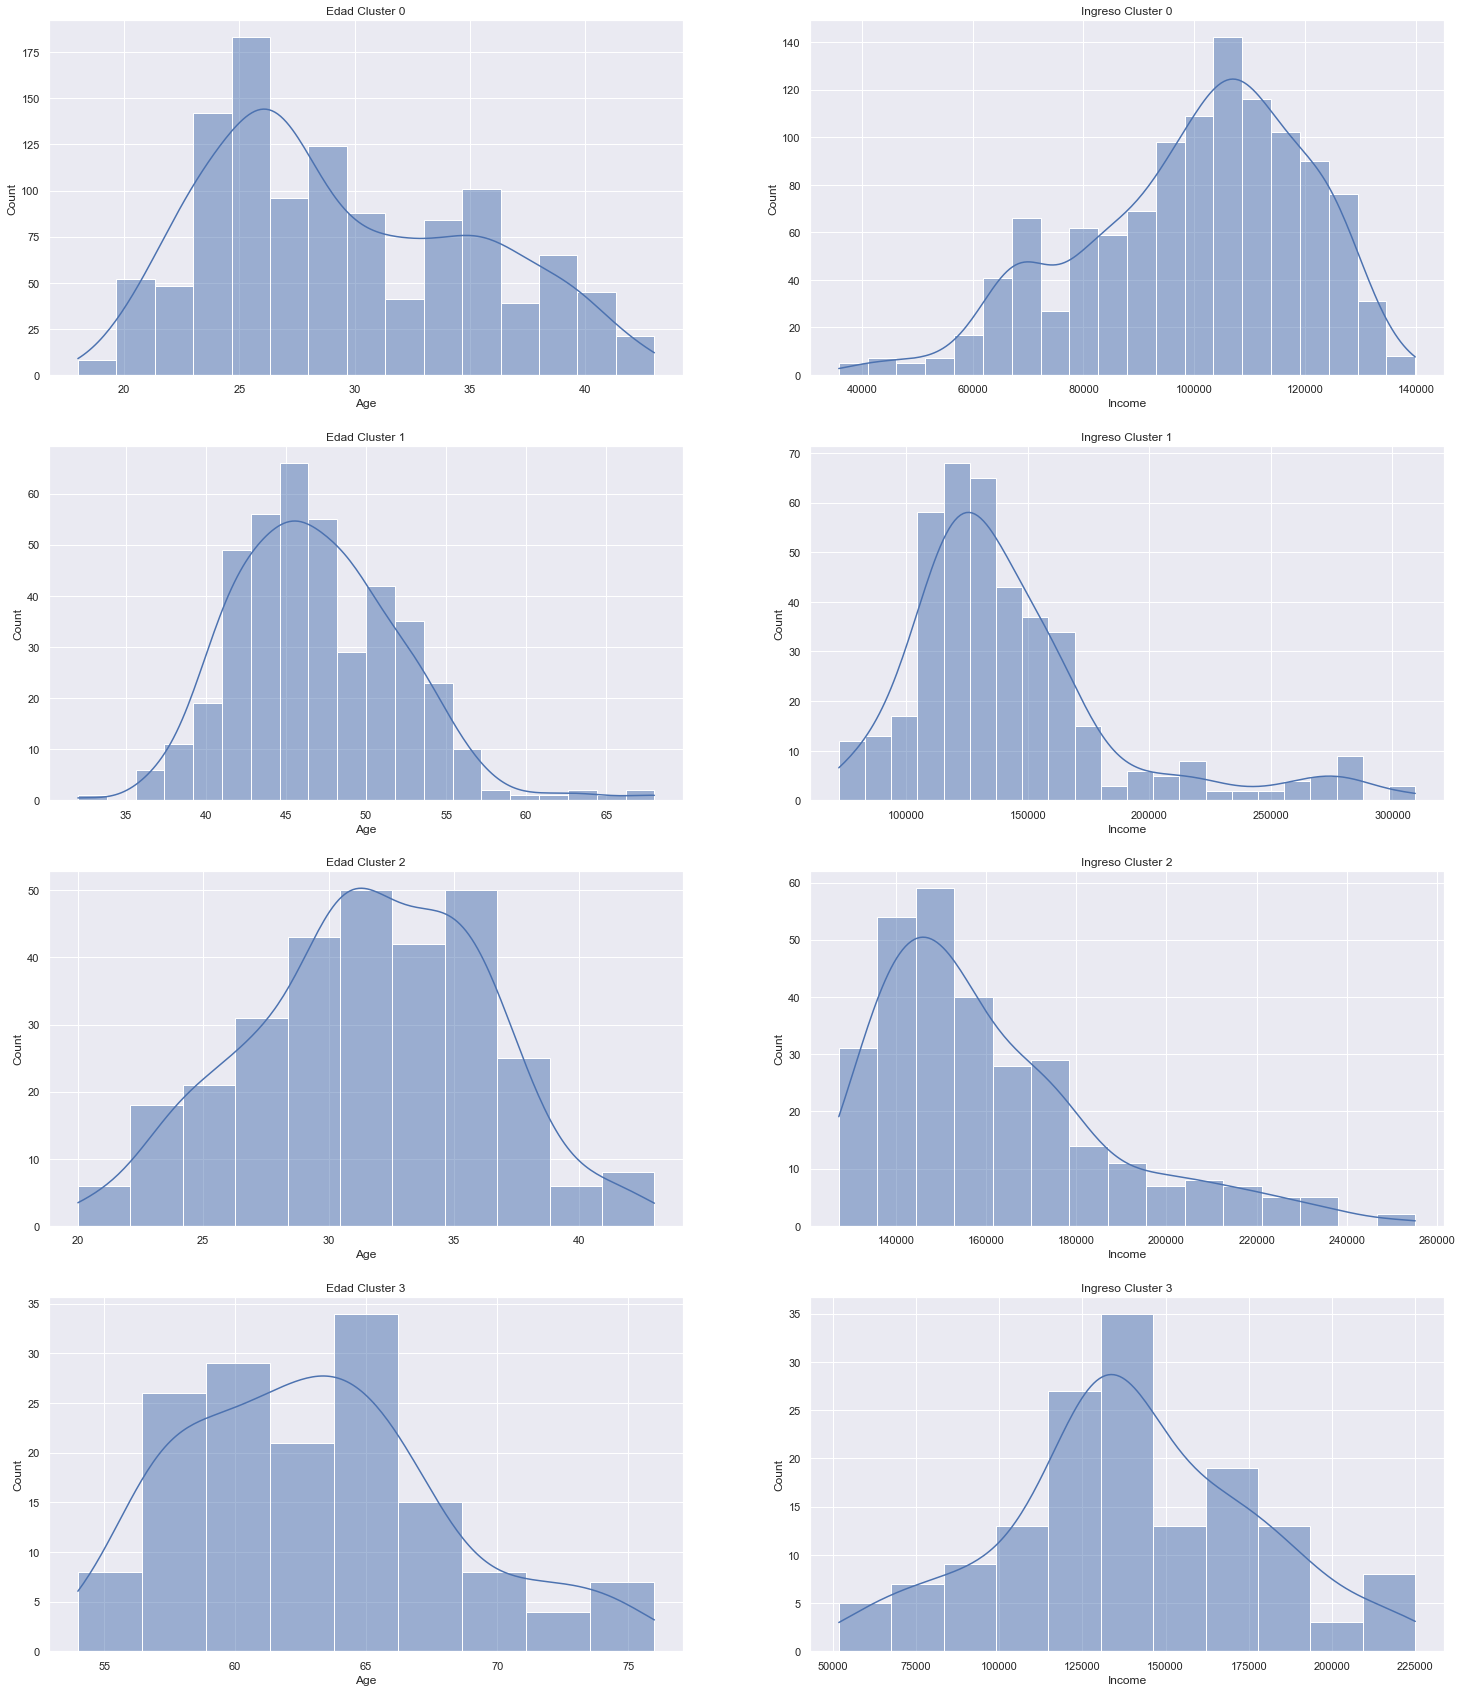

In [9]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(4, 2,figsize=(25, 30))

#create boxplot in each subplot
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==0], x="Age", kde=True,ax=axes[0,0]).set(title="Edad Cluster 0")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==0], x="Income", kde=True,ax=axes[0,1]).set(title="Ingreso Cluster 0")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==1], x="Age", kde=True,ax=axes[1,0]).set(title="Edad Cluster 1")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==1], x="Income", kde=True,ax=axes[1,1]).set(title="Ingreso Cluster 1")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==2], x="Age", kde=True,ax=axes[2,0]).set(title="Edad Cluster 2")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==2], x="Income", kde=True,ax=axes[2,1]).set(title="Ingreso Cluster 2")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==3], x="Age", kde=True,ax=axes[3,0]).set(title="Edad Cluster 3")
sns.histplot(data=ward.loc[ward["Cluster_ward_4"]==3], x="Income", kde=True,ax=axes[3,1]).set(title="Ingreso Cluster 3")


In [10]:
c0 = pd.DataFrame(ward.loc[ward["Cluster_ward_4"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c0.rename(columns={"Age":"Edad_0","Income":"Ingreso_0"},inplace=True)
c1 = pd.DataFrame(ward.loc[ward["Cluster_ward_4"]==1,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c1.rename(columns={"Age":"Edad_1","Income":"Ingreso_1"},inplace=True)
c2 = pd.DataFrame(ward.loc[ward["Cluster_ward_4"]==2,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c2.rename(columns={"Age":"Edad_2","Income":"Ingreso_2"},inplace=True)
c3 = pd.DataFrame(ward.loc[ward["Cluster_ward_4"]==3,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c3.rename(columns={"Age":"Edad_3","Income":"Ingreso_3"},inplace=True)
cward= pd.concat([c0,c1,c2,c3],axis=1)
edad=cward[["Edad_0","Edad_1","Edad_2","Edad_3"]]
edad.style.background_gradient(cmap='Blues',axis=1)

,Edad_0,Edad_1,Edad_2,Edad_3
count,1137.000000,411.000000,300.000000,152.000000
mean,29.423923,46.929440,31.623333,63.078947
std,5.775713,5.183688,4.627400,5.006653
min,18.000000,32.000000,20.000000,54.000000
10%,23.000000,41.000000,25.000000,57.000000
25%,25.000000,43.000000,28.000000,59.000000
50%,28.000000,46.000000,32.000000,63.000000
75%,34.000000,50.000000,35.000000,66.000000
90%,38.000000,54.000000,37.000000,70.900000
max,43.000000,68.000000,43.000000,76.000000


In [11]:
ingreso=cward[["Ingreso_0","Ingreso_1","Ingreso_2","Ingreso_3"]]
ingreso.style.background_gradient(cmap='Blues',axis=1)

,Ingreso_0,Ingreso_1,Ingreso_2,Ingreso_3
count,1137.000000,411.000000,300.000000,152.000000
mean,99960.561126,142764.822384,161306.406667,139377.736842
std,20125.263329,44180.446339,25739.078769,37107.434019
min,35832.000000,72215.000000,127299.000000,51882.000000
10%,69373.000000,104355.000000,135726.800000,87781.900000
25%,86967.000000,116115.500000,142762.000000,121765.500000
50%,103326.000000,132752.000000,153723.500000,135976.500000
75%,115099.000000,157534.000000,173280.750000,165272.750000
90%,124393.400000,193816.000000,199802.000000,189032.900000
max,139896.000000,309364.000000,255198.000000,224998.000000


Tenemos los siguientes cluster:
* 0.- Jovenes con secundaria
* 1.- Adultos jovenes con secundaria y/o universidad
* 2.- Adultos jovenes con secundaria y puesto de manager
* 3.- Adultos mayores con posgrado

In [12]:
del(ward)

# Cluster jerarquico K-medioides

In [13]:
medioides = df[columnas+["K-Medioides-2"]]
medioides

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city,K-Medioides-2
0,67,124670,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,22,150773,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2,49,89210,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1
3,45,171565,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
4,53,149031,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,123525,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1
1996,27,117744,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1997,31,86400,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1998,24,97968,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [14]:
medioides.groupby(by="K-Medioides-2").mean().style.background_gradient(cmap='Blues')

,Age,Income,Sex_Female,Sex_Male,Marital status_Non-single,Marital status_Single,Education_Graduate_School,Education_High_school,Education_Other,Education_University,Occupation_Manager,Occupation_Skilled_employee,Occupation_Unemployed,Settlement size_Big_city,Settlement size_Mid-sized_city,Settlement size_Small_city
K-Medioides-2,,,,,,,,,,,,,,,,
0,29.150112,111563.057506,0.519044,0.480956,0.563107,0.436893,0.006721,0.775205,0.214339,0.003734,0.085885,0.582524,0.331591,0.207618,0.247946,0.544436
1,49.600605,139978.674735,0.331316,0.668684,0.361573,0.638427,0.040847,0.526475,0.000000,0.432678,0.210287,0.503782,0.285930,0.285930,0.320726,0.393343


[Text(0.5, 1.0, 'Ingreso Cluster 1')]

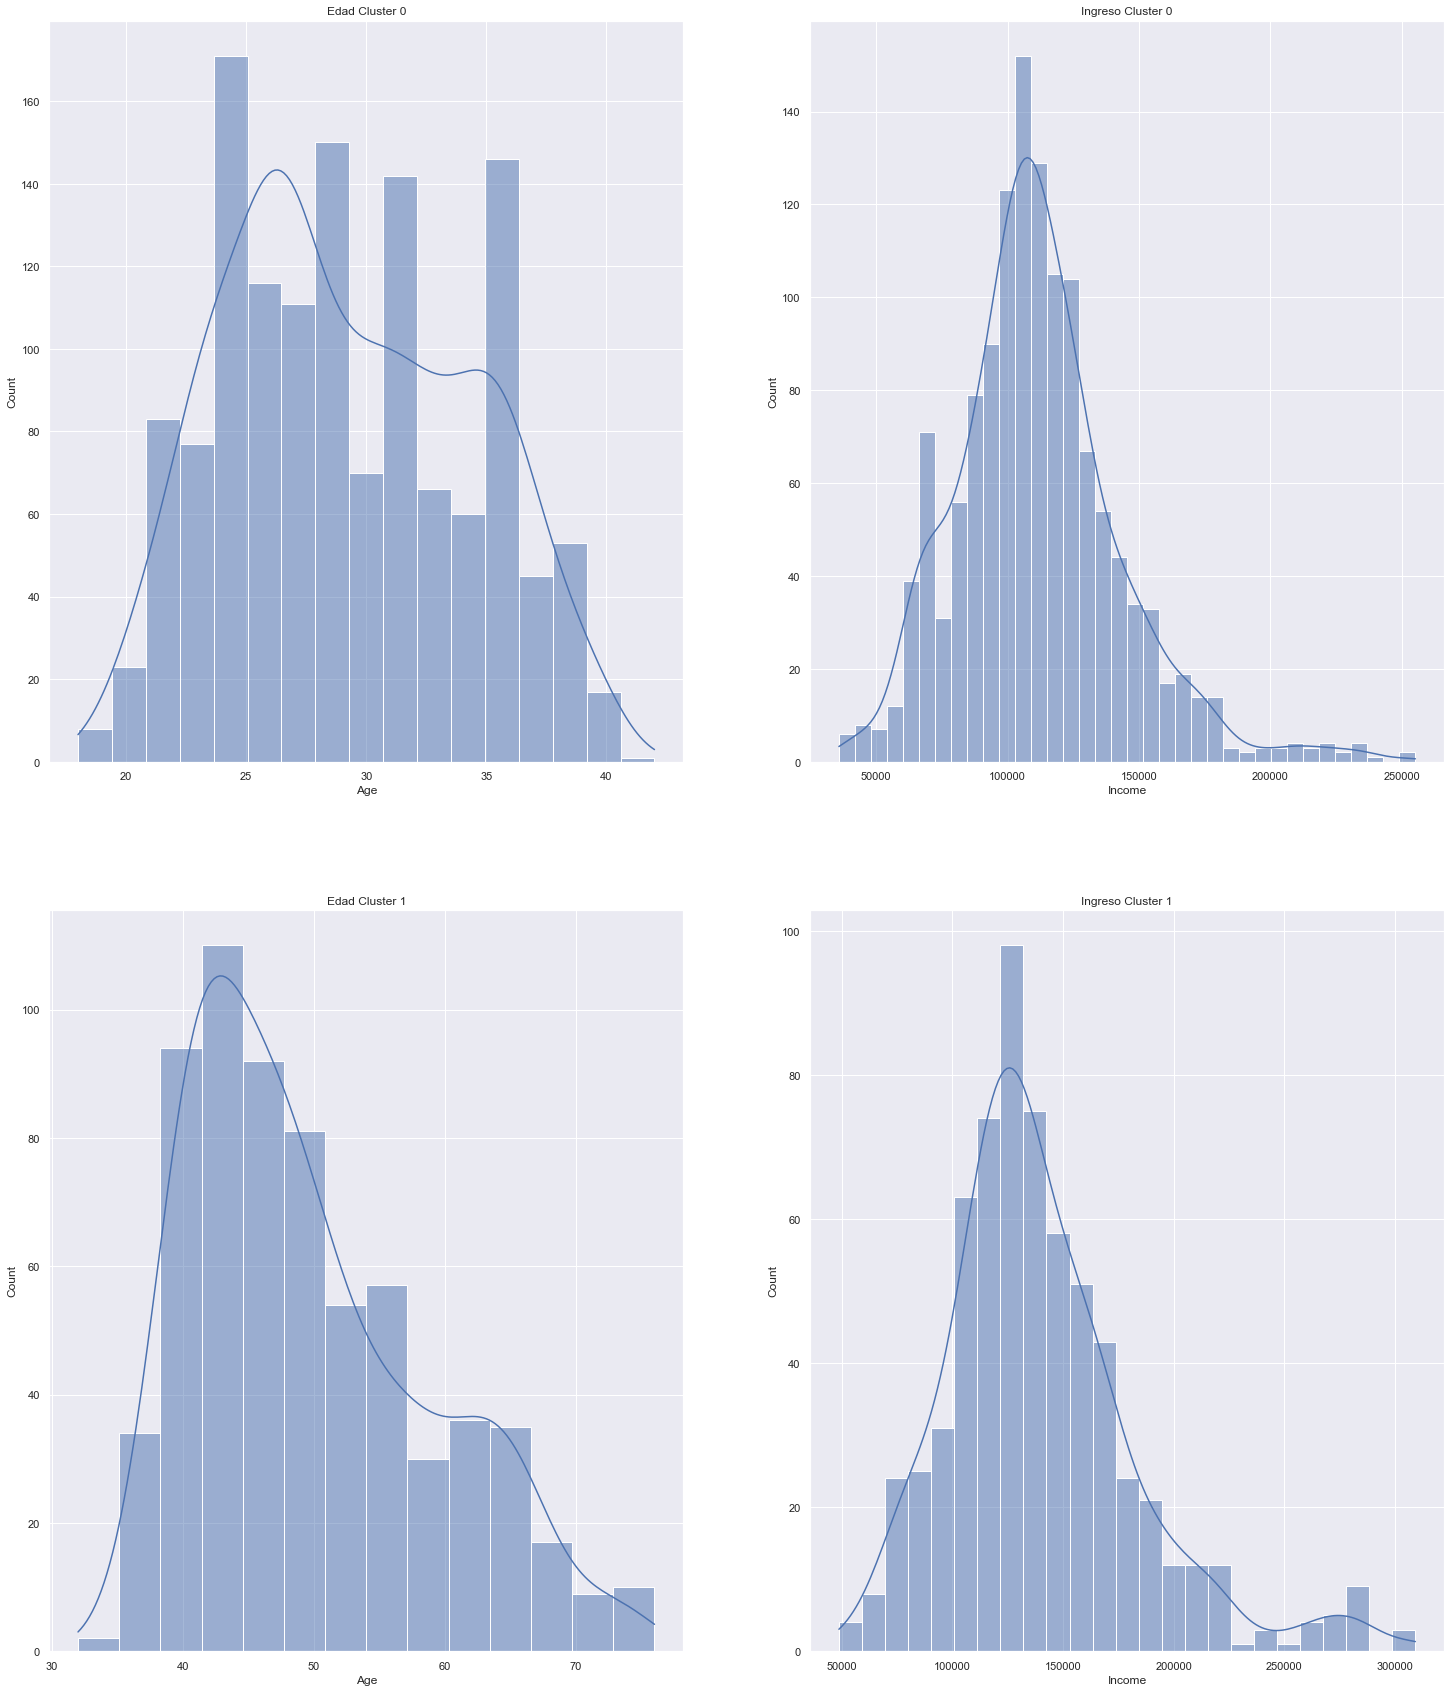

In [15]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2,figsize=(25, 30))

#create boxplot in each subplot
sns.histplot(data=medioides.loc[medioides["K-Medioides-2"]==0], x="Age", kde=True,ax=axes[0,0]).set(title="Edad Cluster 0")
sns.histplot(data=medioides.loc[medioides["K-Medioides-2"]==0], x="Income", kde=True,ax=axes[0,1]).set(title="Ingreso Cluster 0")
sns.histplot(data=medioides.loc[medioides["K-Medioides-2"]==1], x="Age", kde=True,ax=axes[1,0]).set(title="Edad Cluster 1")
sns.histplot(data=medioides.loc[medioides["K-Medioides-2"]==1], x="Income", kde=True,ax=axes[1,1]).set(title="Ingreso Cluster 1")

In [16]:
c0 = pd.DataFrame(medioides.loc[medioides["K-Medioides-2"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c0.rename(columns={"Age":"Edad_0","Income":"Ingreso_0"},inplace=True)
c1 = pd.DataFrame(medioides.loc[medioides["K-Medioides-2"]==1,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c1.rename(columns={"Age":"Edad_1","Income":"Ingreso_1"},inplace=True)

In [17]:
cmedioides= pd.concat([c0,c1],axis=1)
edad_med=cmedioides[["Edad_0","Edad_1"]]
edad_med.style.background_gradient(cmap='Blues',axis=1)

,Edad_0,Edad_1
count,1339.000000,661.000000
mean,29.150112,49.600605
std,5.080726,9.123111
min,18.000000,32.000000
10%,23.000000,40.000000
25%,25.000000,42.000000
50%,29.000000,47.000000
75%,33.000000,56.000000
90%,36.000000,64.000000
max,42.000000,76.000000


In [18]:
ingreso_med=cmedioides[["Ingreso_0","Ingreso_1"]]
ingreso_med.style.background_gradient(cmap='Blues',axis=1)

,Ingreso_0,Ingreso_1
count,1339.000000,661.000000
mean,111563.057506,139978.674735
std,31249.797006,43330.334029
min,35832.000000,48632.000000
10%,71275.000000,92567.000000
25%,92605.500000,112878.000000
50%,108694.000000,132767.000000
75%,126237.000000,159745.000000
90%,150452.200000,193621.000000
max,255198.000000,309364.000000


Tenemos los siguientes cluster:
* 0.- Jovenes
* 1.- Adultos